In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/code/PhasorNetworks.jl`


In [2]:
include("../src/PhasorNetworks.jl")
using .PhasorNetworks, Plots, DifferentialEquations

Precompiling LuxZygoteExt
        Info Given LuxZygoteExt was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Lux → LuxZygoteExt
[ Info: Precompiling LuxZygoteExt [df13723f-0f22-5fb0-8a8f-885eac2ce1ee]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing LuxZygoteExt [df13723f-0f22-5fb0-8a8f-885eac2ce1ee].


In [ ]:
#using CUDA_SDK_jll

In [ ]:
#compute_sanitizer = joinpath(CUDA_SDK_jll.artifact_dir, "cuda/compute-sanitizer/compute-sanitizer")

"/home/wilkie/.julia/artifacts/3c332f1ec584c1a59c6caf509b93603c4cc8738f/cuda/compute-sanitizer/compute-sanitizer"

In [ ]:
#options = ["--launch-timeout=0", "--target-processes=all", "--report-api-errors=no"]

3-element Vector{String}:
 "--launch-timeout=0"
 "--target-processes=all"
 "--report-api-errors=no"

In [ ]:
#run(`$compute_sanitizer $options $(Base.julia_cmd())`)

========= COMPUTE-SANITIZER


In [ ]:
using CUDA

In [4]:
a = CUDA.zeros(Float32, (101,))

101-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [5]:
b = rand(Float32, (101,)) |> cu

101-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 0.64783853
 0.6207898
 0.29351068
 0.25497484
 0.75469995
 0.4288926
 0.39706635
 0.43906856
 0.26001424
 0.009497881
 0.99073106
 0.05486685
 0.6925899
 ⋮
 0.91096187
 0.1714462
 0.4462015
 0.20803362
 0.5319042
 0.096031845
 0.8642398
 0.0010088086
 0.6215436
 0.41794932
 0.5775145
 0.05981499

In [6]:
using Statistics

In [7]:
n_x = 101
phases = range(-1.0, 1.0, n_x) |> collect;

In [8]:
import .PhasorNetworks: spike_current, phase_memory, neuron_constant

In [9]:
spk_args = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [10]:
repeats = 6
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [11]:
tbase = collect(tspan[1]:spk_args.solver_args[:dt]:tspan[2]);

In [12]:
st = phase_to_train(phases, spk_args=spk_args, repeats = repeats)

Spike Train: (101,) with 606 spikes.

In [13]:
u = phase_memory(st, tspan=tspan, spk_args=spk_args);

In [14]:
u |> size

(101, 602)

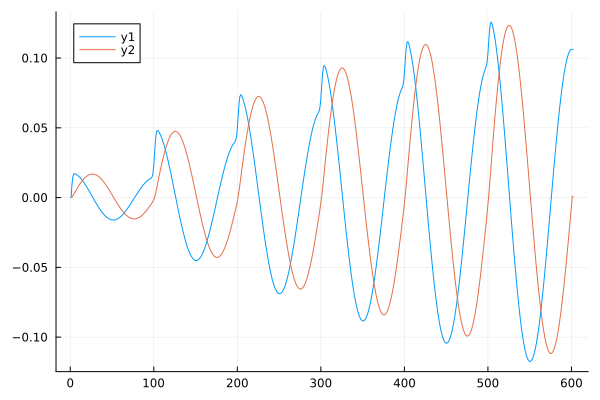

In [15]:
plot(real.(u[1,:]))
plot!(imag.(u[1,:]))

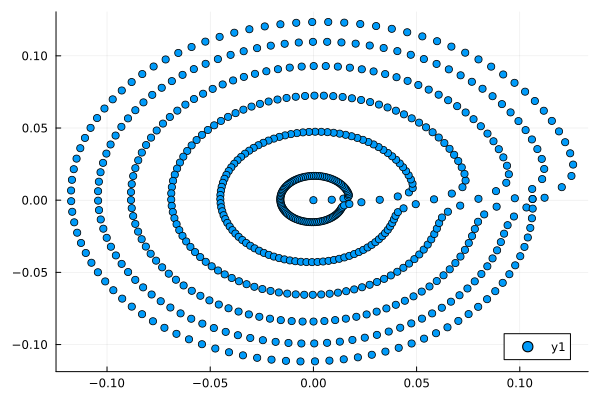

In [16]:
scatter(real.(u[1,:]), imag.(u[1,:]))

In [17]:
sort!(unique(cat(u.t, u.t .+ 0.01, dims=1)))

1204-element Vector{Float64}:
 0.0
 0.009999999776482582
 0.01
 0.019999999552965164
 0.019999999776482584
 0.029999999329447746
 0.029999999552965166
 0.03999999910593033
 0.03999999932944775
 0.04999999888241291
 0.04999999910593033
 0.05999999865889549
 0.05999999888241291
 ⋮
 5.959999867007136
 5.9699998665601015
 5.969999866783619
 5.979999866336584
 5.979999866560101
 5.989999866113067
 5.989999866336584
 5.999999865889549
 5.9999998661130665
 6.0
 6.009999865889549
 6.01

In [18]:
Array(u(u.t))

101×602 Matrix{ComplexF64}:
 0.0+0.0im     0.008884+0.000314159im  …   0.106187+0.000833066im
 0.0+0.0im   0.00888622+0.000244667im      0.108922-0.00588036im
 0.0+0.0im   0.00572972+0.000115573im      0.110281-0.0127688im
 0.0+0.0im   0.00236534+3.31121e-5im       0.110193-0.0197293im
 0.0+0.0im  0.000618391+5.75403e-6im        0.10914-0.0266727im
 0.0+0.0im  0.000101211+6.0647e-7im    …   0.107494-0.0335455im
 0.0+0.0im   1.02681e-5+3.87703e-8im       0.105388-0.040314im
 0.0+0.0im   6.40926e-7+1.50329e-9im       0.102852-0.0469499im
 0.0+0.0im   2.44871e-8+3.53539e-11im     0.0998989-0.0534264im
 0.0+0.0im  5.62675e-10+0.0im             0.0965376-0.0597171im
 0.0+0.0im          0.0+0.0im          …  0.0927804-0.0657964im
 0.0+0.0im          0.0+0.0im             0.0886402-0.0716392im
 0.0+0.0im          0.0+0.0im             0.0841321-0.0772214im
    ⋮                                  ⋱  
 0.0+0.0im          0.0+0.0im              0.101958+0.0857643im
 0.0+0.0im          0.0+0.0im  

In [19]:
typeof(u)

ODESolution{ComplexF32, 2, Vector{Vector{ComplexF32}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{ComplexF32}}}, Nothing, ODEProblem{Vector{ComplexF32}, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, Main.PhasorNetworks.var"#dzdt#111"{SpikingArgs, SpikeTrain, Main.PhasorNetworks.var"#27#28"{Float32, Float32}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, Heun{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, OrdinaryDiffEqCore.InterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, Main.PhasorNetworks.var"#dzdt#111"{SpikingArgs, SpikeTrain, Main.PhasorNetworks.var"#27#28"{Float32, Float32}}, LinearAlgebra.UniformSc

In [20]:
st1 = solution_to_train(u, tspan, spk_args = spk_args, offset=0.0)

Spike Train: (101,) with 606 spikes.

In [21]:
p1 = train_to_phase(st1, spk_args=spk_args)

6×101 Matrix{Float64}:
 0.997326  -0.982654  -0.962014  -0.941465  …  0.955291  0.968571  0.997326
 0.996732  -0.983247  -0.962607  -0.942058     0.956919  0.973878  0.996732
 0.996182  -0.983797  -0.963157  -0.942608     0.957058  0.974941  0.996182
 0.995674  -0.984305  -0.963665  -0.943116     0.95688   0.975171  0.995674
 0.995208  -0.984772  -0.964131  -0.943583     0.956602  0.975119  0.995208
 0.997503  -0.982832  -0.963308  -0.943606  …  0.956296  0.974951  0.997503

In [22]:
?cld

search: cld include include_string include_dependency DirectLdiv! CFRLDDRK64



```
cld(x, y)
```

Smallest integer larger than or equal to `x / y`. Equivalent to `div(x, y, RoundUp)`.

See also [`div`](@ref), [`fld`](@ref).

# Examples

```jldoctest
julia> cld(5.5, 2.2)
3.0

julia> cld.(-5:5, 3)'
1×11 adjoint(::Vector{Int64}) with eltype Int64:
 -1  -1  -1  0  0  0  1  1  1  2  2
```


In [23]:
err2 = p1[end-1,:] .- phases;

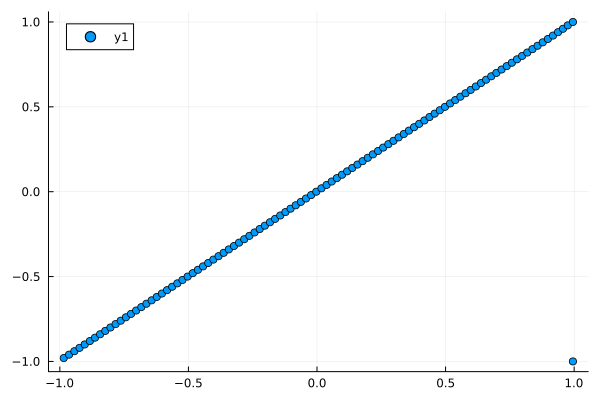

In [24]:
scatter(p1[end-1,:], phases)

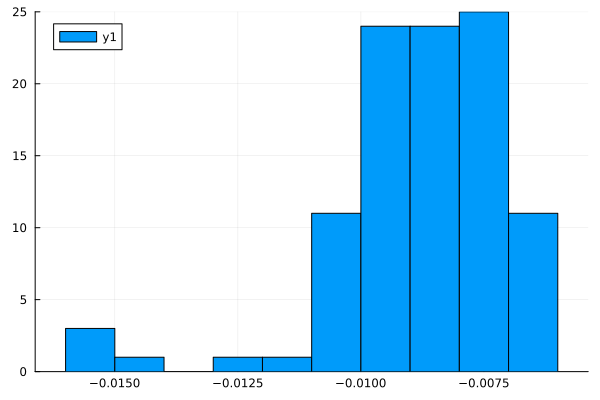

In [25]:
histogram(arc_error(err2))

In [26]:
u_arr = Array(u);

In [27]:
u_arr

101×602 Matrix{ComplexF32}:
 0.0+0.0im     0.008884+0.000314159im  …   0.106187+0.000833066im
 0.0+0.0im   0.00888622+0.000244667im      0.108922-0.00588036im
 0.0+0.0im   0.00572972+0.000115573im      0.110281-0.0127688im
 0.0+0.0im   0.00236534+3.31121f-5im       0.110193-0.0197293im
 0.0+0.0im  0.000618391+5.75403f-6im        0.10914-0.0266727im
 0.0+0.0im  0.000101211+6.0647f-7im    …   0.107494-0.0335455im
 0.0+0.0im   1.02681f-5+3.87703f-8im       0.105388-0.040314im
 0.0+0.0im   6.40926f-7+1.50329f-9im       0.102852-0.0469499im
 0.0+0.0im   2.44871f-8+3.53539f-11im     0.0998989-0.0534264im
 0.0+0.0im  5.62675f-10+0.0im             0.0965376-0.0597171im
 0.0+0.0im          0.0+0.0im          …  0.0927804-0.0657964im
 0.0+0.0im          0.0+0.0im             0.0886402-0.0716392im
 0.0+0.0im          0.0+0.0im             0.0841321-0.0772214im
    ⋮                                  ⋱  
 0.0+0.0im          0.0+0.0im              0.101958+0.0857643im
 0.0+0.0im          0.0+0.0im  

In [28]:
using CUDA

In [29]:
stg = SpikeTrainGPU(st)

SpikeTrainGPU(CartesianIndex{1}[CartesianIndex(1,), CartesianIndex(2,), CartesianIndex(3,), CartesianIndex(4,), CartesianIndex(5,), CartesianIndex(6,), CartesianIndex(7,), CartesianIndex(8,), CartesianIndex(9,), CartesianIndex(10,)  …  CartesianIndex(92,), CartesianIndex(93,), CartesianIndex(94,), CartesianIndex(95,), CartesianIndex(96,), CartesianIndex(97,), CartesianIndex(98,), CartesianIndex(99,), CartesianIndex(100,), CartesianIndex(101,)], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  597, 598, 599, 600, 601, 602, 603, 604, 605, 606], Float32[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 5.0], (101,), 101, 0.0)

In [30]:
using ChainRulesCore: ignore_derivatives

In [31]:
import .PhasorNetworks: gaussian_kernel

In [32]:
stg.indices

606-element CuArray{CartesianIndex{1}, 1, CUDA.DeviceMemory}:
 CartesianIndex(1,)
 CartesianIndex(2,)
 CartesianIndex(3,)
 CartesianIndex(4,)
 CartesianIndex(5,)
 CartesianIndex(6,)
 CartesianIndex(7,)
 CartesianIndex(8,)
 CartesianIndex(9,)
 CartesianIndex(10,)
 CartesianIndex(11,)
 CartesianIndex(12,)
 CartesianIndex(13,)
 ⋮
 CartesianIndex(90,)
 CartesianIndex(91,)
 CartesianIndex(92,)
 CartesianIndex(93,)
 CartesianIndex(94,)
 CartesianIndex(95,)
 CartesianIndex(96,)
 CartesianIndex(97,)
 CartesianIndex(98,)
 CartesianIndex(99,)
 CartesianIndex(100,)
 CartesianIndex(101,)

In [33]:
stg.linear_indices

606-element CuArray{Int64, 1, CUDA.DeviceMemory}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 595
 596
 597
 598
 599
 600
 601
 602
 603
 604
 605
 606

In [34]:
stg.shape

(101,)

In [35]:
stg.linear_shape

101

In [36]:
function scatter_add_kernel!(output, values, indices)
    i = (blockIdx().x - 1) * blockDim().x + threadIdx().x
    if i <= length(indices)
        index = indices[i]
        value = values[i]
        CUDA.@atomic output[index] += value
    end
    return nothing
end

function parallel_scatter_add(indices::CuArray{Int}, values::CuArray{T}, output_size::Int) where T
    @assert length(indices) == length(values) "Length of indices and values must match"
    
    output = CUDA.zeros(T, output_size)
    threads = 256
    blocks = cld(length(indices), threads)
    
    @cuda threads=threads blocks=blocks scatter_add_kernel!(output, values, indices)
    
    return output
end

parallel_scatter_add (generic function with 1 method)

In [37]:
# Set up sample data
n = 1_00
m = 100_000

# Create indices and values on the GPU
d_indices = rand(1:n, m) |> CuArray{Int}
d_values = CUDA.rand(Float32, m);

In [38]:
typeof(m)

Int64

In [39]:
d_indices

100000-element CuArray{Int64, 1, CUDA.DeviceMemory}:
  57
  40
  32
  16
  84
  97
  77
  79
  60
  48
  28
  72
  53
   ⋮
  58
  15
  66
  86
 100
  67
  47
  76
  95
  81
  89
  60

In [40]:
v = parallel_scatter_add(d_indices, d_values, n)

100-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 498.379
 483.3731
 522.35034
 504.60657
 473.73657
 514.39594
 480.14236
 506.00378
 452.26132
 484.79285
 542.5718
 473.96402
 466.13785
   ⋮
 479.01535
 497.76096
 490.71854
 494.3061
 516.2238
 477.0307
 496.42908
 524.137
 494.3855
 490.5244
 529.3867
 490.4104

In [41]:
for i in 1:1000 parallel_scatter_add(d_indices, d_values, n) end

In [42]:
for i in 1:10000 parallel_scatter_add(d_indices, d_values, n) end

In [43]:
for i in 1:100000 parallel_scatter_add(d_indices, d_values, n) end

In [44]:
v

100-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 498.379
 483.3731
 522.35034
 504.60657
 473.73657
 514.39594
 480.14236
 506.00378
 452.26132
 484.79285
 542.5718
 473.96402
 466.13785
   ⋮
 479.01535
 497.76096
 490.71854
 494.3061
 516.2238
 477.0307
 496.42908
 524.137
 494.3855
 490.5244
 529.3867
 490.4104

In [45]:
function gaussian_kernel_gpu(x::Float32, t::Float32, t_sigma::Float32)
    i = exp(-1.0f0 * ((t - x) / (2.0f0 * t_sigma))^2.0f0)
    return i
end

gaussian_kernel_gpu (generic function with 1 method)

In [46]:
typeof(spk_args.t_window)

Float32

In [47]:
i0 = gaussian_kernel_gpu.(stg.times, 0.4f0, Float32(spk_args.t_window))

606-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [48]:
for i in 1:1000 gaussian_kernel_gpu.(stg.times, 0.4f0, Float32(spk_args.t_window)) end

In [49]:
for i in 1:10000 gaussian_kernel_gpu.(stg.times, 0.4f0, Float32(spk_args.t_window)) end

In [50]:
for i in 1:100000 gaussian_kernel_gpu.(stg.times, 0.4f0, Float32(spk_args.t_window)) end

In [51]:
i0

606-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [52]:
stg.linear_indices

606-element CuArray{Int64, 1, CUDA.DeviceMemory}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 595
 596
 597
 598
 599
 600
 601
 602
 603
 604
 605
 606

In [53]:
stg.linear_indices

606-element CuArray{Int64, 1, CUDA.DeviceMemory}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 595
 596
 597
 598
 599
 600
 601
 602
 603
 604
 605
 606

In [54]:
typeof(stg.linear_shape)

Int64

In [55]:
function parallel_current(stg::SpikeTrainGPU, t::Float32, spk_args::SpikingArgs)
    currents = gaussian_kernel_gpu.(stg.times, t, Float32(spk_args.t_window))
    output = parallel_scatter_add(stg.linear_indices, currents, stg.linear_shape)
    
    return output
    
end

parallel_current (generic function with 1 method)

In [56]:
ik = parallel_current(stg, 0.1f0, spk_args)

101-element CuArray{Float32, 1, CUDA.DeviceMemory}:
 1.3887945f-11
 1.6052218f-9
 1.12535176f-7
 4.7851177f-6
 0.00012340969
 0.0019304542
 0.01831562
 0.1053992
 0.36787927
 0.77880085
 1.0
 0.77880085
 0.3678796
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.3887945f-11

In [63]:
for i in 1:1000
    parallel_current(stg, 0.1f0, spk_args)
end

exit()

In [64]:
for i in 1:10000
    parallel_current(stg, 0.1f0, spk_args)
end

LoadError: CUDA error: an illegal memory access was encountered (code 700, ERROR_ILLEGAL_ADDRESS)

In [ ]:
0.0f0:0.01f0:1.1f0

In [62]:
iv = stack([parallel_current(stg, t, spk_args) for t in 0.0f0:0.01f0:1.1f0])

LoadError: CUDA error: an illegal memory access was encountered (code 700, ERROR_ILLEGAL_ADDRESS)

In [53]:
iv2 = Array(iv)

101×111 Matrix{Float64}:
 1.0          0.778801     0.367879    …  0.0          0.0
 0.778801     1.0          0.778801       0.0          0.0
 0.367879     0.778801     1.0            0.0          0.0
 0.105399     0.367879     0.778801       0.0          0.0
 0.0183156    0.105399     0.367879       0.0          0.0
 0.00193045   0.0183156    0.105399    …  0.0          0.0
 0.00012341   0.00193045   0.0183156      0.0          0.0
 4.78512e-6   0.00012341   0.00193045     0.0          0.0
 1.12535e-7   4.78512e-6   0.00012341     0.0          0.0
 1.60523e-9   1.12535e-7   4.78511e-6     0.0          0.0
 1.38879e-11  1.60523e-9   1.12535e-7  …  0.0          0.0
 7.28773e-14  1.38879e-11  1.60523e-9     0.0          0.0
 2.31953e-16  7.28773e-14  1.3888e-11     0.0          0.0
 ⋮                                     ⋱               ⋮
 0.0          0.0          0.0            3.72002e-44  1.31531e-48
 0.0          0.0          0.0         …  6.38136e-40  3.71999e-44
 0.0          0.0

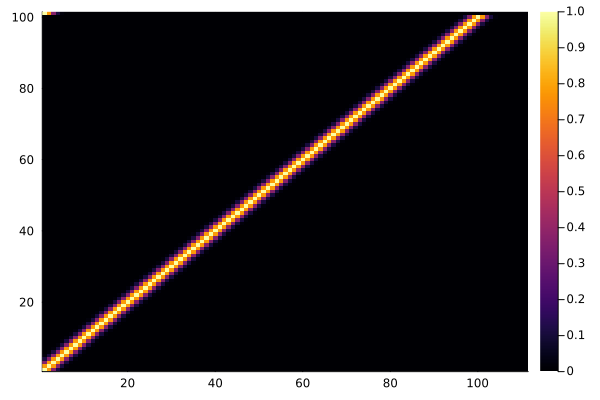

In [54]:
heatmap(iv2)

In [ ]:
struct Params_GPU
    train::SpikeTrainGPU
    spk_args::SpikingArgs
end

In [ ]:
function spike_current(train::SpikeTrainGPU, t::Real, spk_args::SpikingArgs)
    scale = spk_args.spk_scale

    current = parallel_current(train, t, spk_args)
    current = reshape(current, train.shape)
    
    return current
end


spike_current (generic function with 2 methods)

In [42]:
ival = spike_current(stg, 0.4, spk_args)

101-element CuArray{Float64, 1, CUDA.DeviceMemory}:
 1.9151695967140057e-174
 7.236408365193862e-166
 1.6584090690839577e-157
 2.3052234555541416e-149
 1.9435117223039787e-141
 9.938377371644518e-134
 3.082433669369418e-126
 5.798658269985809e-119
 6.616242127461842e-112
 4.5788153506567096e-105
 1.921952023716585e-98
 4.893108033142025e-92
 7.555790646964772e-86
 ⋮
 2.064203254888655e-261
 3.681075257441117e-272
 3.980925941682492e-283
 2.6116284345687722e-294
 1.0391825650020618e-305
 2.5079884e-317
 0.0
 0.0
 0.0
 0.0
 0.0
 1.9151695967140057e-174

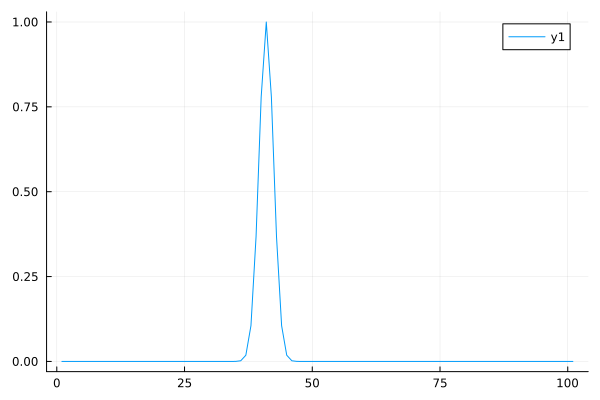

In [43]:
plot(Array(ival))

In [44]:
@time ivals = stack([Array(spike_current(stg, t, spk_args)) for t in 0.0:0.001:1.0], dims=1)

LoadError: CUDA error: an illegal memory access was encountered (code 700, ERROR_ILLEGAL_ADDRESS)

In [37]:
for i in 1:100
    ivals = stack([Array(spike_current(stg, t, spk_args)) for t in 0.0:0.001:1.0], dims=1)
end

LoadError: CUDA error: an illegal memory access was encountered (code 700, ERROR_ILLEGAL_ADDRESS)

CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaErro


Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] r

CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaErro

 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request

.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_en

eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memor

CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enu

~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.juli

(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000


    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] chec

code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x0000

memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/exe

CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc)

 ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.jul

.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CU

pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packa

cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUD

~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJul

(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code

 ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/

0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=

CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/

000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CU

 pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/pack

0002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA

IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ C

02bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.c

 CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~

bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cud

[11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/

))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaE

    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    

)
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc


 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:34 [inlined]
  [4] free(mem::CUDA.DeviceMemory; stream::Nothing)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:89
  [5] free
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/memory.jl:82 [inlined]
  [6] #1103
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:716 [inlined]
  [7] #context!#990
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory

))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaE

~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.jl:889 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/eventloop.jl:38

Stacktrace:
  [1] throw_api_error(res::CUDA.cudaError_enum)
    @ CUDA ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:30
  [2] check
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/libcuda.jl:37 [inlined]
  [3] cuMemFree_v2
    @ ~/.julia/packages/CUDA/2kjXI/lib/utils/call.jl:3

)
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaEr


    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:168 [inlined]
  [8] context!
    @ ~/.julia/packages/CUDA/2kjXI/lib/cudadrv/state.jl:163 [inlined]
  [9] _pool_free
    @ ~/.julia/packages/CUDA/2kjXI/src/memory.jl:715 [inlined]
 [10] macro expansion
    @ ./timing.jl:395 [inlined]
 [11] pool_free(managed::CUDA.Managed{CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/memory.jl:689
 [12] release(::GPUArrays.RefCounted{CUDA.Managed{CUDA.DeviceMemory}})
    @ GPUArrays ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:42
 [13] unsafe_free!
    @ ~/.julia/packages/GPUArrays/qt4ax/src/host/abstractarray.jl:91 [inlined]
 [14] unsafe_free!(xs::CuArray{Float64, 1, CUDA.DeviceMemory})
    @ CUDA ~/.julia/packages/CUDA/2kjXI/src/array.jl:94
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/bHdNn/src/execute_request.jl:138
 [16] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [17] invokelatest
    @ ./essentials.j


CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaError_enum(0x000002bc))
CUDA.CuError(code=CUDA.cudaErr

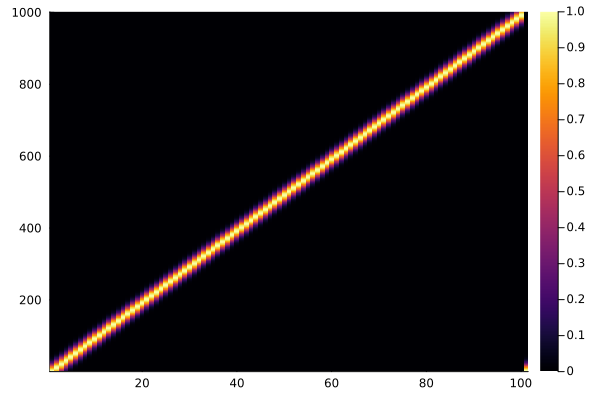

In [35]:
heatmap(ivals)

In [ ]:
@time ivals2 = stack([Array(spike_current(st, t, spk_args)) for t in 0.0:0.001:1.0], dims=1)

  0.281247 seconds (300.07 k allocations: 25.587 MiB, 97.58% compilation time)


1001×101 Matrix{Float32}:
 1.0       0.778801  0.367879   0.105399   …  0.0       0.0       1.0
 0.997503  0.816687  0.405555   0.122151      0.0       0.0       0.997503
 0.99005   0.852144  0.444858   0.140858      0.0       0.0       0.99005
 0.977751  0.884706  0.485537   0.161621      0.0       0.0       0.977751
 0.960789  0.913931  0.527292   0.18452       0.0       0.0       0.960789
 0.939413  0.939413  0.569783   0.209611   …  0.0       0.0       0.939413
 0.913931  0.960789  0.612626   0.236928      0.0       0.0       0.913931
 0.884706  0.977751  0.655406   0.266468      0.0       0.0       0.884706
 0.852144  0.99005   0.697676   0.298197      0.0       0.0       0.852144
 0.816687  0.997503  0.738968   0.33204       0.0       0.0       0.816687
 0.778801  1.0       0.778801   0.367879   …  0.0       0.0       0.778801
 0.738968  0.997503  0.816687   0.405555      0.0       0.0       0.738968
 0.697676  0.99005   0.852144   0.444858      0.0       0.0       0.697676
 ⋮   

In [ ]:
sum(abs2.(ivals .- ivals2))

31.03233663466881

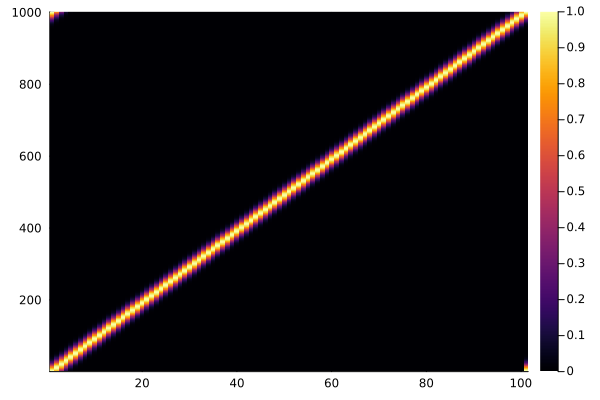

In [ ]:
heatmap(ivals2)

In [ ]:
spk_args

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [ ]:
spk_args.update_fn

#27 (generic function with 1 method)

In [ ]:
z0 = rand(ComplexF32, (101,)) |> CuArray

101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
   0.61749214f0 + 0.08656204f0im
   0.38383162f0 + 0.80840784f0im
    0.5331893f0 + 0.72314966f0im
     0.873105f0 + 0.375018f0im
   0.78575665f0 + 0.7894383f0im
     0.916247f0 + 0.3273847f0im
   0.11553544f0 + 0.77796394f0im
   0.27054942f0 + 0.5781397f0im
   0.87462777f0 + 0.41575122f0im
   0.14852375f0 + 0.28497738f0im
    0.3986572f0 + 0.2706254f0im
   0.95177263f0 + 0.31994468f0im
    0.8970877f0 + 0.21364617f0im
                ⋮
    0.7032591f0 + 0.056235015f0im
   0.58491874f0 + 0.6503856f0im
    0.5625699f0 + 0.7059316f0im
    0.7600526f0 + 0.059738576f0im
   0.64696765f0 + 0.88743573f0im
   0.40780318f0 + 0.109914005f0im
   0.87949806f0 + 0.22036207f0im
   0.60476357f0 + 0.46207362f0im
 0.0004888177f0 + 0.5335155f0im
    0.1085459f0 + 0.946552f0im
   0.71730745f0 + 0.27847904f0im
   0.47711283f0 + 0.3592013f0im

In [ ]:
spk_args.update_fn(z0)

101-element CuArray{ComplexF64, 1, CUDA.DeviceMemory}:
  -0.6673837498460828 + 3.862505129702912im
   -5.156142606099274 + 2.2500036279518394im
   -4.650321160666185 + 3.2054972236617862im
  -2.5309285892206206 + 5.410876841711094im
    -5.11733850277714 + 4.77916696167915im
   -2.240268203673114 + 5.691472810368379im
   -4.911198661869416 + 0.57033777961615im
   -3.686668892257597 + 1.5842841744135867im
  -2.7871675031783028 + 5.412298103631296im
  -1.8202704142427215 + 0.8762067554122032im
  -1.7801210558882399 + 2.450711996242824im
  -2.2006262368773073 + 5.916174869993199im
   -1.521796036769797 + 5.593838978561015im
                      ⋮
 -0.49398684455208797 + 4.407460306845843im
   -4.203477107819271 + 3.5450756931559972im
   -4.548013064801515 + 3.3935447112509967im
  -0.5273590698578846 + 4.763603747958903im
   -5.705316696535946 + 3.887530482452172im
  -0.7721706955963268 + 2.5403201342244093im
  -1.5604753159363256 + 5.481976903227705im
  -3.0242469194839043 + 3.7074268364

In [ ]:
function dzdt(u, p, t)
    return spk_args.update_fn(u) .+ spike_current(stg, t, spk_args)
end

dzdt (generic function with 1 method)

In [ ]:
du0 = dzdt(z0, nothing, 0.1)

101-element CuArray{ComplexF64, 1, CUDA.DeviceMemory}:
   -0.667383749832195 + 3.862505129702912im
   -5.156142604494046 + 2.2500036279518394im
   -4.650321048131031 + 3.2054972236617862im
  -2.5309238041043516 + 5.410876841711094im
   -5.117215093006155 + 4.77916696167915im
   -2.238337749177311 + 5.691472810368379im
   -4.892883027893318 + 0.57033777961615im
  -3.5812696629840204 + 1.5842841744135867im
   -2.419288127788828 + 5.412298103631296im
   -1.041469491910897 + 0.8762067554122032im
  -0.7801210558882454 + 2.450711996242824im
  -1.4218254305958307 + 5.916174869993199im
  -1.1539164969253923 + 5.593838978561015im
                      ⋮
 -0.49398684455208797 + 4.407460306845843im
   -4.203477107819271 + 3.5450756931559972im
   -4.548013064801515 + 3.3935447112509967im
  -0.5273590698578846 + 4.763603747958903im
   -5.705316696535946 + 3.887530482452172im
  -0.7721706955963268 + 2.5403201342244093im
  -1.5604753159363256 + 5.481976903227705im
  -3.0242469194839043 + 3.7074268364

In [ ]:
du = CUDA.zeros(ComplexF32, (101,)) |> CuArray

101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
       ⋮
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im

In [ ]:
function dzdt!(du, u, p, t)
    sum!(du, spk_args.update_fn(u) .+ spike_current(stg, t, spk_args))
    return nothing
end

dzdt! (generic function with 1 method)

In [ ]:
dzdt!(du, z0, nothing, 0.1)

In [ ]:
du

101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
 -0.66738373f0 + 3.8625052f0im
  -5.1561427f0 + 2.2500036f0im
   -4.650321f0 + 3.2054973f0im
  -2.5309238f0 + 5.4108768f0im
   -5.117215f0 + 4.779167f0im
  -2.2383378f0 + 5.691473f0im
   -4.892883f0 + 0.5703378f0im
  -3.5812697f0 + 1.5842842f0im
  -2.4192882f0 + 5.412298f0im
  -1.0414695f0 + 0.87620676f0im
   -0.780121f0 + 2.450712f0im
  -1.4218254f0 + 5.916175f0im
  -1.1539165f0 + 5.593839f0im
               ⋮
 -0.49398685f0 + 4.40746f0im
   -4.203477f0 + 3.5450757f0im
   -4.548013f0 + 3.3935447f0im
 -0.52735907f0 + 4.7636037f0im
  -5.7053165f0 + 3.8875306f0im
  -0.7721707f0 + 2.5403202f0im
  -1.5604753f0 + 5.481977f0im
   -3.024247f0 + 3.7074268f0im
  -3.3522747f0 - 0.10363177f0im
  -5.9690704f0 + 0.49270362f0im
   -1.893197f0 + 4.4512796f0im
   -2.352351f0 + 2.9259481f0im

In [ ]:
duc = du |> Array

101-element Vector{ComplexF32}:
 -0.66738373f0 + 3.8625052f0im
  -5.1561427f0 + 2.2500036f0im
   -4.650321f0 + 3.2054973f0im
  -2.5309238f0 + 5.4108768f0im
   -5.117215f0 + 4.779167f0im
  -2.2383378f0 + 5.691473f0im
   -4.892883f0 + 0.5703378f0im
  -3.5812697f0 + 1.5842842f0im
  -2.4192882f0 + 5.412298f0im
  -1.0414695f0 + 0.87620676f0im
   -0.780121f0 + 2.450712f0im
  -1.4218254f0 + 5.916175f0im
  -1.1539165f0 + 5.593839f0im
               ⋮
 -0.49398685f0 + 4.40746f0im
   -4.203477f0 + 3.5450757f0im
   -4.548013f0 + 3.3935447f0im
 -0.52735907f0 + 4.7636037f0im
  -5.7053165f0 + 3.8875306f0im
  -0.7721707f0 + 2.5403202f0im
  -1.5604753f0 + 5.481977f0im
   -3.024247f0 + 3.7074268f0im
  -3.3522747f0 - 0.10363177f0im
  -5.9690704f0 + 0.49270362f0im
   -1.893197f0 + 4.4512796f0im
   -2.352351f0 + 2.9259481f0im

In [ ]:
sum(abs2.(du .- du0))

2.0980220325438443e-12

In [ ]:
function phase_memory(x::SpikeTrainGPU; tspan::Tuple{<:Real, <:Real} = (0.0, 10.0), spk_args::SpikingArgs)
    update_fn = spk_args.update_fn

    #set up compartments for each sample
    u0 = CUDA.zeros(ComplexF32, x.shape)
    #resonate in time with the input spikes
    function dzdt(u, p, t)
        return update_fn(u) #spike_current(x, t, spk_args))
    end

    prob = ODEProblem(dzdt, u0, tspan)
    return prob
    #sol = solve(prob, spk_args.solver; spk_args.solver_args...)

    return sol
end

phase_memory (generic function with 4 methods)

In [ ]:
p0 = phase_memory(stg, spk_args=spk_args)

ODEProblem with uType CuArray{ComplexF32, 1, CUDA.DeviceMemory} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
       ⋮
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im

In [ ]:
sol0 = solve(p0, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.001099999985098839
  0.011099999687075621
  0.11109999521672739
  1.1110999356120848
 10.0
u: 7-element Vector{CuArray{ComplexF32, 1, CUDA.DeviceMemory}}:
 ComplexF32[0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im  …  0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im]
 ComplexF32[0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im  …  0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0i

In [ ]:
struct Params_GPU
    train::SpikeTrainGPU
    spk_args::SpikingArgs
end

In [ ]:
params = (x => stg, spk_args => spk_args)

In [ ]:
function phase_memory(x::SpikeTrainGPU; tspan::Tuple{<:Real, <:Real} = (0.0, 10.0), spk_args::SpikingArgs)
    update_fn = spk_args.update_fn

    #set up compartments for each sample
    u0 = CUDA.zeros(ComplexF32, x.shape)
    p = NamedTuple
    #resonate in time with the input spikes
    function dzdt(u, p, t)
        return update_fn(u) .+ spike_current(p.x, t, p.spk_args)
    end

    prob = ODEProblem(dzdt, u0, tspan)
    return prob
    #sol = solve(prob, spk_args.solver; spk_args.solver_args...)

    return sol
end

phase_memory (generic function with 4 methods)

In [62]:
p0 = phase_memory(stg, spk_args=spk_args)

ODEProblem with uType CuArray{ComplexF32, 1, CUDA.DeviceMemory} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
       ⋮
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im

In [63]:
sol0 = solve(p0, Tsit5())

LoadError: CUDA error: an illegal memory access was encountered (code 700, ERROR_ILLEGAL_ADDRESS)

In [ ]:
# function phase_memory(x::SpikeTrainGPU; tspan::Tuple{<:Real, <:Real} = (0.0, 10.0), spk_args::SpikingArgs)
#     update_fn = spk_args.update_fn

#     #set up compartments for each sample
#     u0 = CUDA.zeros(ComplexF32, x.shape)
#     #resonate in time with the input spikes
#     function dzdt!(du, u, p, t)
#         sum!(du, update_fn(u)) #spike_current(x, t, spk_args))
#     end

#     prob = ODEProblem(dzdt!, u0, tspan)
#     return prob
#     #sol = solve(prob, spk_args.solver; spk_args.solver_args...)

#     return sol
# end

phase_memory (generic function with 4 methods)

In [53]:
p0 = phase_memory(stg, spk_args=spk_args)

ODEProblem with uType CuArray{ComplexF32, 1, CUDA.DeviceMemory} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 101-element CuArray{ComplexF32, 1, CUDA.DeviceMemory}:
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
       ⋮
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im
 0.0f0 + 0.0f0im

In [54]:
solve(p0, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.001099999985098839
  0.011099999687075621
  0.11109999521672739
  1.1110999356120848
 10.0
u: 7-element Vector{CuArray{ComplexF32, 1, CUDA.DeviceMemory}}:
 ComplexF32[0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im  …  0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im]
 ComplexF32[0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im  …  0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im, 0.0f0 + 0.0f0i